In [2]:
import os
import cv2
import numpy as np
from utils.preprocessing import crop_img

IMG_SIZE = 256

base_dirs = ["datasets/brain_tumor_collection/", "datasets/MRI-Images-of-Brain-Tumor/"]

for base in base_dirs:
	training = base + 'train'
	testing = base + 'test'
	validation = base + 'validation'

	training_dirs = os.listdir(training)
	testing_dirs = os.listdir(testing)


	for dir in training_dirs:
		save_path = base + "/processed/train/" + dir
		path = os.path.join(training, dir)
		images = os.listdir(path)
		for img in images:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

	for dir in testing_dirs:
		save_path = base + "/processed/test/" + dir
		path = os.path.join(testing, dir)
		images = os.listdir(path)
		for img in images:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

	if not os.path.exists(validation):
		continue

	validation_dirs = os.listdir(validation)
	for dir in validation_dirs:
		save_path = base + "/processed/validation/" + dir
		path = os.path.join(validation, dir)
		images = os.listdir(path)
		for img in images:
			image = cv2.imread(os.path.join(path, img))
			new_img = crop_img(image)
			new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
			if not os.path.exists(save_path):
				os.makedirs(save_path)
			cv2.imwrite(save_path+'/'+img, new_img)

In [6]:
import os

def numToLabel(num):
    if num == 0:
        return "glioma"
    elif num == 1:
        return "meningioma"
    elif num == 2:
        return "notumor"
    elif num == 3:
        return "pituitary"


# base = "datasets/combined/val"

# for i in range(4):
#     path = os.path.join(base, numToLabel(i))
#     os.makedirs(path)
    

In [21]:
def reshape_dataset(dataset, target_shape=(224, 224)):
    reshaped_images = []

    for img in dataset:
        # Resize the image
        resized_img = img.resize(target_shape)
        
        # Append the resized image to the list
        reshaped_images.append(resized_img)

    return reshaped_images

In [43]:
from datasets import load_from_disk
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

base_dir = os.getcwd() + '/datasets/brain_tumor_collection/'

data = load_from_disk(base_dir)

train_images = data['train']['image']
train_labels = data['train']['label']

test_images = data['test']['image']
test_labels = data['test']['label']

train_images = reshape_dataset(train_images)
test_images = reshape_dataset(test_images)

In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical

combined_data = list(zip(train_images, train_labels))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Unzip the shuffled data
shuffled_images, shuffled_labels = zip(*combined_data)

# Calculate the index to split the training set for validation
split_index = int(len(shuffled_images) * 0.8)  # Adjust the split percentage as needed

# Split the shuffled data into training and validation sets
val_images, val_labels = shuffled_images[split_index:], shuffled_labels[split_index:]
train_images, train_labels = shuffled_images[:split_index], shuffled_labels[:split_index]

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_images = np.stack(train_images)

train_generator = train_datagen.flow(
    x=train_images,
    y=to_categorical(train_labels, num_classes=4),
    batch_size=32,
)

test_images = np.stack(test_images)

test_generator = test_datagen.flow(
    x=test_images,
    y=to_categorical(test_labels, num_classes=4),
    batch_size=32,
)

val_images = np.stack(val_images)

val_generator = test_datagen.flow(
    x=val_images,
    y=to_categorical(val_labels, num_classes=4),
    batch_size=32,
)


In [39]:
from datasets import load_from_disk
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

second_base_dir = os.getcwd() + '/datasets/MRI-Images-of-Brain-Tumor/'

second_data = load_from_disk(second_base_dir)

second_train_images = second_data['train']['image']
second_train_labels = second_data['train']['label']

second_test_images = second_data['test']['image']
second_test_labels = second_data['test']['label']

second_val_images = second_data['validation']['image']
second_val_labels = second_data['validation']['label']

second_train_images = reshape_dataset(second_train_images)
second_test_images = reshape_dataset(second_test_images)
second_val_images = reshape_dataset(second_val_images)

In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

second_train_datagen = ImageDataGenerator(rescale=1./255)
second_test_datagen = ImageDataGenerator(rescale=1./255)

second_train_images = np.stack(second_train_images)

# Generate the image data
second_train_generator = second_train_datagen.flow(
    x=second_train_images,
    y=to_categorical(second_train_labels, num_classes=4),
    batch_size=32,
)

second_test_images = np.stack(second_test_images)

second_test_generator = second_test_datagen.flow(
    x=second_test_images,
    y=to_categorical(second_test_labels, num_classes=4),
    batch_size=32,
)

second_val_images = np.stack(second_val_images)

second_val_generator = test_datagen.flow(
    x=second_val_images,
    y=to_categorical(second_val_labels, num_classes=4),
    batch_size=32,
)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

third_base_dir = os.getcwd() + '/datasets/kaggle/non_processed/'

third_train_data_gen = ImageDataGenerator(rescale=1./255)
third_test_data_gen = ImageDataGenerator(rescale=1./255)

third_train_generator = third_train_data_gen.flow_from_directory(third_base_dir + "Training", target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)
third_test_generator = third_test_data_gen.flow_from_directory(third_base_dir + "Testing", target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

def build_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    # Learning rate scheduler
    def lr_schedule(epoch):
        return 1e-3 * np.power(0.9, epoch // 10)

    model.compile(optimizer=Adam(learning_rate=lr_schedule(0)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def build_tl_model():
    # Create the base model
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Create the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [27]:
kaggle_model = build_tl_model()

kaggle_model.fit(third_train_generator, epochs=60)
kaggle_model.evaluate(third_test_generator)


Epoch 1/60
179/179 [==============================] - 61s 329ms/step - loss: 1.0516 - accuracy: 0.5476
Epoch 2/60
179/179 [==============================] - 59s 329ms/step - loss: 0.7921 - accuracy: 0.6821
Epoch 3/60
179/179 [==============================] - 59s 330ms/step - loss: 0.6945 - accuracy: 0.7269
Epoch 4/60
179/179 [==============================] - 59s 329ms/step - loss: 0.6495 - accuracy: 0.7372
Epoch 5/60
179/179 [==============================] - 70s 392ms/step - loss: 0.6228 - accuracy: 0.7461
Epoch 6/60
179/179 [==============================] - 71s 394ms/step - loss: 0.5876 - accuracy: 0.7623
Epoch 7/60
179/179 [==============================] - 70s 393ms/step - loss: 0.5852 - accuracy: 0.7663
Epoch 8/60
179/179 [==============================] - 70s 393ms/step - loss: 0.5626 - accuracy: 0.7771
Epoch 9/60
179/179 [==============================] - 71s 394ms/step - loss: 0.5760 - accuracy: 0.7647
Epoch 10/60
179/179 [==============================] - 70s 393ms/step - l

[0.38697558641433716, 0.8375285863876343]

In [6]:
kaggle_model.fit(third_train_generator, epochs=5)

Epoch 1/5
179/179 [==============================] - 35s 197ms/step - loss: 0.0348 - accuracy: 0.9904
Epoch 2/5
179/179 [==============================] - 35s 197ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 3/5
179/179 [==============================] - 35s 197ms/step - loss: 0.0940 - accuracy: 0.9667
Epoch 4/5
179/179 [==============================] - 35s 196ms/step - loss: 0.0759 - accuracy: 0.9739
Epoch 5/5
179/179 [==============================] - 35s 196ms/step - loss: 0.0452 - accuracy: 0.9860


In [28]:
from tensorflow.keras.models import load_model  
kaggle_2 = load_model('models/kaggle_model.h5')
kaggle_2.summary()
kaggle_2.evaluate(third_test_generator)
kaggle_model.evaluate(third_test_generator)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 20,107,076
Trainable params: 82,692
Non-trainable params: 20,024,384
_____________________________________

[0.38697564601898193, 0.8375285863876343]

In [23]:
kaggle_model.evaluate(second_test_generator)

17/17 [==============================] - 1s 53ms/step - loss: 13.7617 - accuracy: 0.4525


[13.761652946472168, 0.4525139629840851]

In [15]:
kaggle_model.evaluate(test_generator)

13/13 [==============================] - 1s 49ms/step - loss: 5.2849 - accuracy: 0.3477


[5.284912586212158, 0.34771573543548584]

In [111]:
kaggle_model.save("models/kaggle_model.h5")

In [81]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("Training model 1")
model = build_model()
model.fit(train_generator, epochs=100, shuffle=True, validation_data=val_generator, callbacks=[early_stopping])

print("Evaluation model 1")
print("It's own dataset: ")
performance1 = model.evaluate(test_generator)
print(performance1)
print("Another dataset: ")
performance2 = model.evaluate(second_test_generator)
print(performance2)

backend.clear_session()

print("Training model 2")
second_model = build_model()
second_model.fit(second_train_generator, epochs=100, shuffle=True, validation_data=second_val_generator, callbacks=[early_stopping])

print("Evaluation model 2")
print("It's own dataset: ")
performance3 = second_model.evaluate(second_test_generator)
print(performance3)
print("Another dataset: ")
performance4 = second_model.evaluate(test_generator)
print(performance4)

backend.clear_session()

print("Training model 3")
third_model = build_model()
third_model.fit(train_generator, epochs=100, shuffle=True, validation_data=second_val_generator, callbacks=[early_stopping])

print("Evaluation model 3")
print("It's own dataset: ")
performance9 = third_model.evaluate(test_generator)
print(performance9)
print("Another dataset: ")
performance10 = third_model.evaluate(second_test_generator)
print(performance10)

backend.clear_session()

print("Training model 4")
fourth_model = build_model()
fourth_model.fit(second_train_generator, epochs=100, shuffle=True, validation_data=val_generator, callbacks=[early_stopping])

print("Evaluation model 4")
print("It's own dataset: ")
performance11 = fourth_model.evaluate(second_test_generator)
print(performance11)
print("Another dataset: ")
performance12 = fourth_model.evaluate(test_generator)
print(performance12)

backend.clear_session()

print("Training transfer learning model 1")
tl_model1 = build_tl_model()
tl_model1.fit(train_generator, epochs=100, shuffle=True, validation_data=val_generator, callbacks=[early_stopping])

print("Evaluation transfer learning model 1")
print("It's own dataset: ")
performance5 = tl_model1.evaluate(test_generator)
print(performance5)
print("Another dataset: ")
performance6 = tl_model1.evaluate(second_test_generator)
print(performance6)

backend.clear_session()

print("Training transfer learning model 2")
tl_model2 = build_tl_model()
tl_model2.fit(second_train_generator, epochs=100, shuffle=True, validation_data=second_val_generator, callbacks=[early_stopping])

print("Evaluation transfer learning model 2")
print("It's own dataset: ")
performance7 = tl_model2.evaluate(second_test_generator)
print(performance7)
print("Another dataset: ")
performance8 = tl_model2.evaluate(test_generator)
print(performance8)

Training model 1
Epoch 1/100
72/72 [==============================] - 17s 216ms/step - loss: 1.1156 - accuracy: 0.6337 - val_loss: 5.9409 - val_accuracy: 0.2596
Epoch 2/100
72/72 [==============================] - 15s 214ms/step - loss: 0.7059 - accuracy: 0.7474 - val_loss: 4.3676 - val_accuracy: 0.2997
Epoch 3/100
72/72 [==============================] - 15s 213ms/step - loss: 0.5466 - accuracy: 0.7879 - val_loss: 3.6749 - val_accuracy: 0.2857
Epoch 4/100
72/72 [==============================] - 15s 211ms/step - loss: 0.4498 - accuracy: 0.8323 - val_loss: 2.2518 - val_accuracy: 0.2735
Epoch 5/100
72/72 [==============================] - 15s 212ms/step - loss: 0.3766 - accuracy: 0.8650 - val_loss: 2.5153 - val_accuracy: 0.3850
Epoch 6/100
72/72 [==============================] - 15s 211ms/step - loss: 0.3051 - accuracy: 0.8872 - val_loss: 1.2693 - val_accuracy: 0.4843
Epoch 7/100
72/72 [==============================] - 15s 212ms/step - loss: 0.2722 - accuracy: 0.8981 - val_loss: 0.964

In [14]:
model.evaluate(test_generator)

13/13 [==============================] - 1s 50ms/step - loss: 6.8174 - accuracy: 0.2919


[6.817440032958984, 0.2918781638145447]

In [20]:
model.evaluate(test_generator)

17/17 [==============================] - 1s 38ms/step - loss: 0.1226 - accuracy: 0.9888


[0.12264547497034073, 0.9888268113136292]

In [91]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('test_image.jpeg', target_size=(224, 224))
image_array = image.img_to_array(img)
image_array = np.expand_dims(img, axis=0)

prediction = second_model.predict(image_array)
print(numToLabel(np.argmax(prediction)))

1/1 [==============================] - 0s 29ms/step
no_tumor


In [11]:
model.save("models/categorical_tumor_v2.h5")

In [1]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('models/categorical_tumor_v2.h5')

2024-01-30 16:08:31.061296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 16:08:31.174832: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-30 16:08:31.177955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-30 16:08:31.177968: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

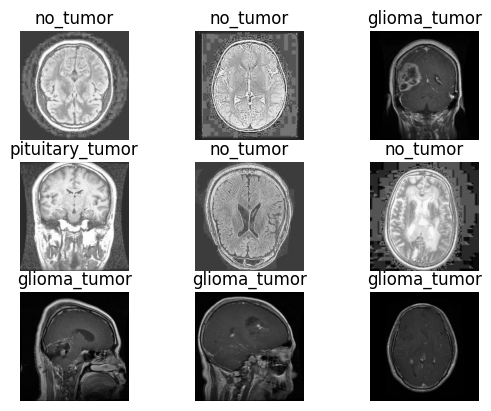

In [18]:
import matplotlib.pyplot as plt

images, labels = second_train_generator[0]

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(numToLabel(np.argmax(labels[i])))
    plt.axis('off')

plt.show()

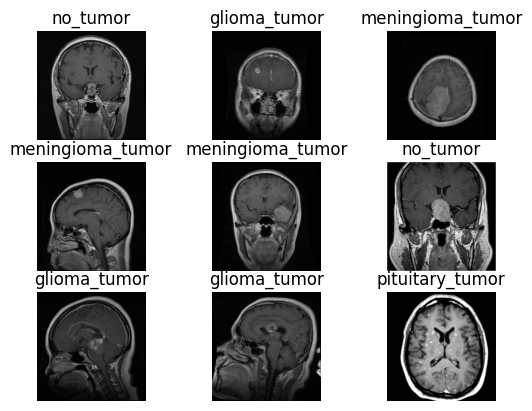

In [19]:
images, labels = train_generator[0]

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(numToLabel(np.argmax(labels[i])))
    plt.axis('off')

plt.show()

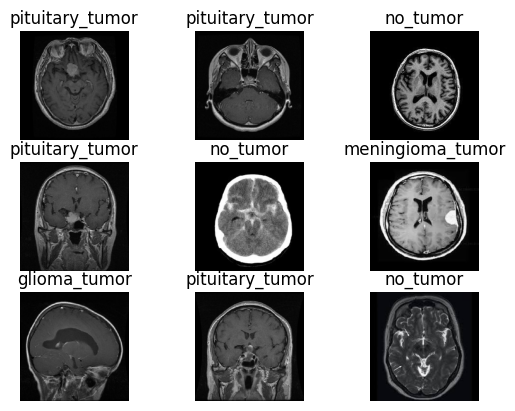

In [22]:
images, labels = third_train_generator[0]

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(numToLabel(np.argmax(labels[i])))
    plt.axis('off')

plt.show()